## Assignment 4 & 5

### Data Visualization-1

<ol>
<li>
Use the inbuilt dataset 'titanic. The dataset contains 891 rows and contains
information about the passengers who boarded the unfortunate Titanic ship. Use the
Seaborn library to see if we can find any patterns in the data. 
</li>
<li>
Write a code to check how the price of the ticket (columnname:'fare') for each
passenger is distributed by plotting a histogram.
</li>
</ol>

#### Importing Libraries

In [2]:
import seaborn as sns
import pandas as pd

#### Loading dataset

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic['deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

### Correlation between count of survived people and sex

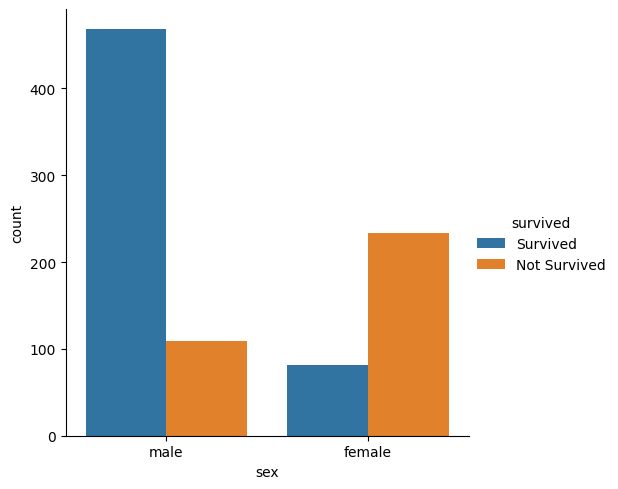

In [22]:
titanic['survived'] = titanic['survived'].replace({0: 'Survived', 1: 'Not Survived'})

sns.catplot(x='sex',hue='survived',kind='count',data=titanic)

Conclusion: Survival rate is comparatively higher for males 

#### Correlation between Passenger Class and Count of survived people

<Axes: xlabel='survived', ylabel='class'>

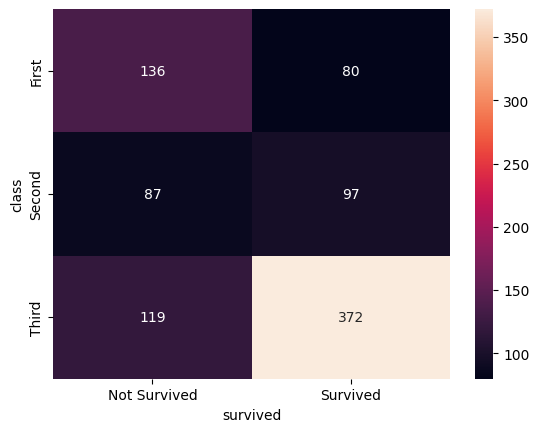

In [23]:
group = titanic.groupby(['class','survived'],observed=False)

pclass_survived = group.size().unstack()

sns.heatmap(pclass_survived, annot = True, fmt ="d")

#### Correlation b/w Age, Sex and distribution of Survived

<Axes: xlabel='sex', ylabel='age'>

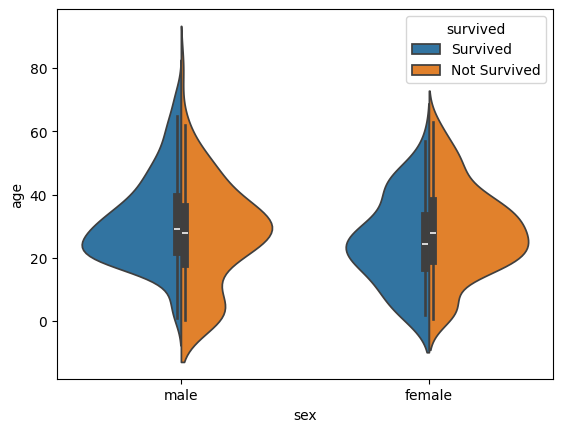

In [24]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = titanic, split = True)

Conclusion: Survival rate is higher for age group 20-40, as well as the maximum number of people who could not survive lies in the age group 20-40

#### Correlation b/w Fare and Survival Probability

<Axes: xlabel='Fare_Range', ylabel='survived'>

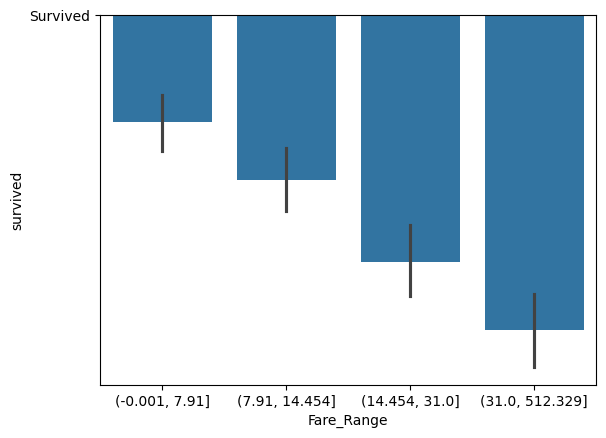

In [25]:
titanic['Fare_Range'] = pd.qcut(titanic['fare'], 4)
 
# Barplot - Shows approximate values based 
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='survived', data = titanic)

Conclusion: Higher Probability of survival for people having higher fare

#### Correlation b/w City Embarked on, Passenger Class and Count of Survived

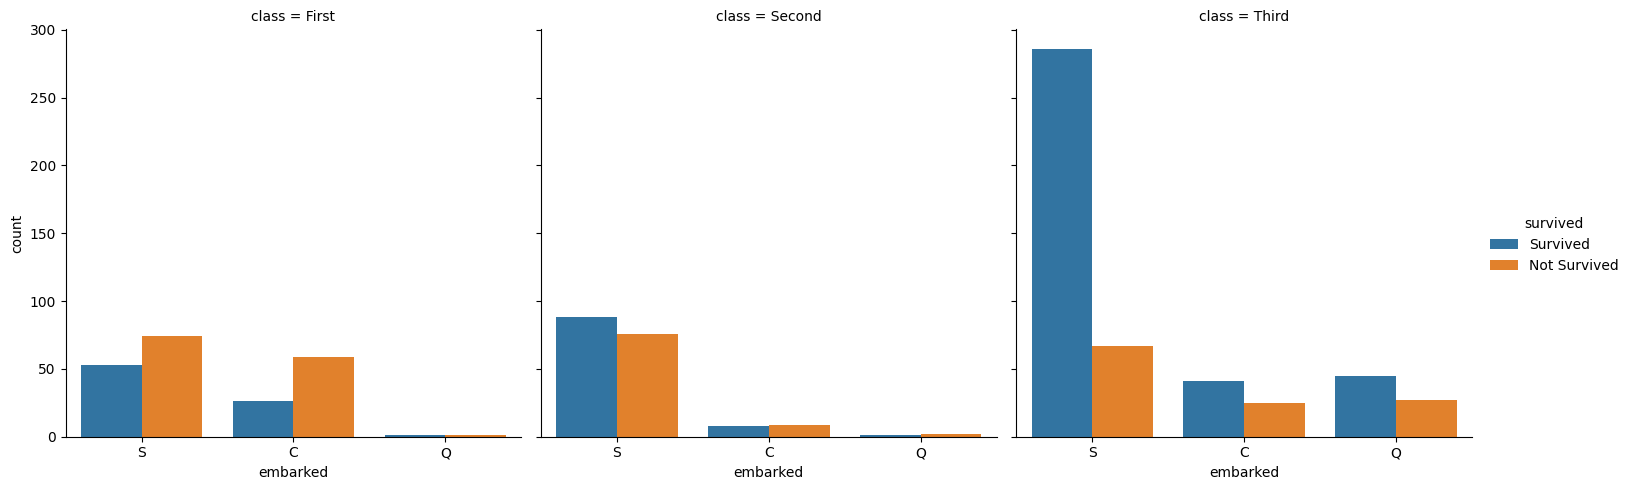

In [26]:
sns.catplot(x ='embarked', hue ='survived', kind ='count', col ='class', data = titanic)

#### Analyzing data of `fare` column using histogram

<Axes: xlabel='fare', ylabel='Count'>

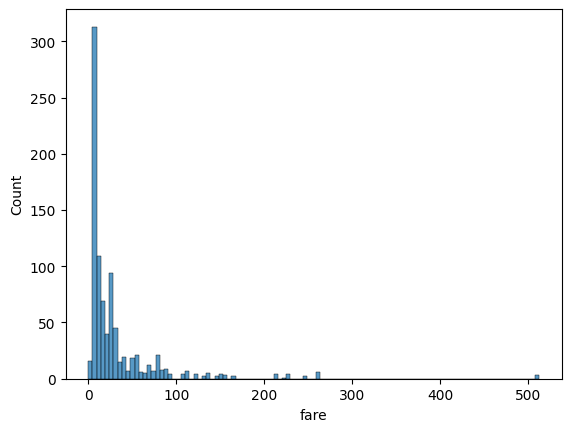

In [27]:
sns.histplot(data=titanic, x='fare')

### Data Visualization-2

<ol>
<li>
Use the inbuilt dataset 'titanic' as used in the above problem. Plot a box plot for
distribution of age with respect to each gender along with the information about
whether they survived or not. (Column names: 'sex' and'age') 
</li>
</ol>

<Axes: xlabel='sex', ylabel='age'>

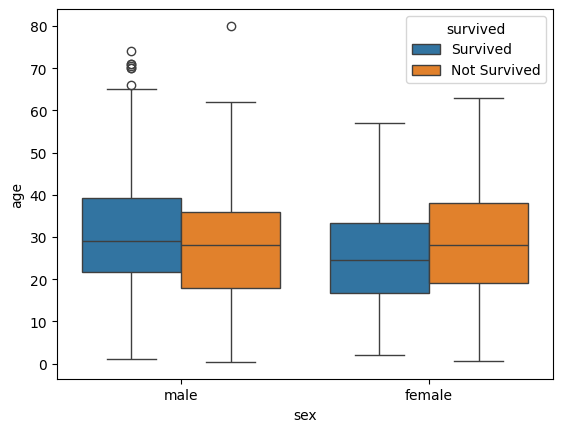

In [28]:
sns.boxplot(x=titanic['sex'], y=titanic['age'], hue=titanic['survived'])